In [2]:
import pandas as pd
import re
# Define a function to extract salary and pay period
def extract_salary_and_pay_period(salary_string):
    if 'a year' in salary_string:
        pay_period = 'YEARLY'
        match = re.search(r'\$([\d,.]+[kK]?)-?([\d,.]+[kK]?)?', salary_string)
        if match:
            low_value = match.group(1).replace(',', '').replace('k', '000').replace('K', '000')
            high_value = match.group(2).replace(',', '').replace('k', '000').replace('K', '000') if match.group(2) else low_value
            salary = (float(low_value) + float(high_value)) / 2
        else:
            match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
            if match:
                salary = float(match.group(1).replace(',', '').replace('k', '000').replace('K', '000'))
            else:
                salary = None
    elif 'a month' in salary_string:
        pay_period = 'MONTHLY'
        match = re.findall(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary_range = [(float(m.replace(',', '').replace('k', '000').replace('K', '000'))) for m in match]
            salary = sum(salary_range) / len(salary_range)
        else:
            salary = None
    elif 'an hour' in salary_string:
        pay_period = 'HOURLY'
        match = re.search(r'\$([\d,.]+[kK]?)', salary_string)
        if match:
            salary = float(match.group(1).replace(',', '').replace('k', '000').replace('K', '000'))
        else:
            salary = None
    else:
        pay_period = 'unknown'
        salary = None
    return salary, pay_period

In [9]:
coutries_data = pd.read_csv("data/countries.csv")
coutries_data = coutries_data[["name","alpha-2","region","sub-region"]]

coutries_data.head()

,name,alpha-2,region,sub-region
0,Afghanistan,AF,Asia,Southern Asia
1,Åland Islands,AX,Europe,Northern Europe
2,Albania,AL,Europe,Southern Europe
3,Algeria,DZ,Africa,Northern Africa
4,American Samoa,AS,Oceania,Polynesia


In [3]:
jobs_data = pd.read_csv("data/allJobs.csv")
jobs_data.drop(columns=["Date-Posted"],inplace=True)
jobs_data.rename(columns = {'Company':'company','Job-Title':'title','Job-Type':'work-type','Salary':'salary'	,'Location':'location'	,'Description':'description' }, inplace = True)
jobs_data = jobs_data[jobs_data.salary.notnull()]
# Apply the function to the 'salary' column
jobs_data['salary'], jobs_data['pay_period'] = zip(*jobs_data['salary'].apply(extract_salary_and_pay_period))

company_data= jobs_data['company'].drop_duplicates().reset_index(drop=True).reset_index()
company_data.columns = ['company_id', 'company']
company_data['company_id'] = company_data['company_id'] + 3700152515

jobs_data = pd.merge(jobs_data, company_data, on='company', how='left')
jobs_data.drop(columns=["company"],inplace=True)
jobs_data['work-type'].replace({"Contractor": "Contract"}, inplace=True)
jobs_data.head()

,title,work-type,salary,location,description,pay_period,company_id
0,Central Graduate Advisor,Full-time,47210.0,"Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3700152515
1,Post-doctoral Fellow,Full-time,50000.0,"Edmonton, AB",ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3700152515
2,Graduate Research Assistant,Full-time,20000.0,"Calgary, AB",The Adaptive Bionics Lab at the University of ...,YEARLY,3700152516
3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,"Edmonton, AB",PH School of Public Health\n\nCompetition No. ...,YEARLY,3700152515
4,"Advisor, Student Service Centre",Full-time,51055.0,"Edmonton, AB",RO Student Service Centre\n\nCompetition No. -...,YEARLY,3700152515


<Axes: xlabel='pay_period'>

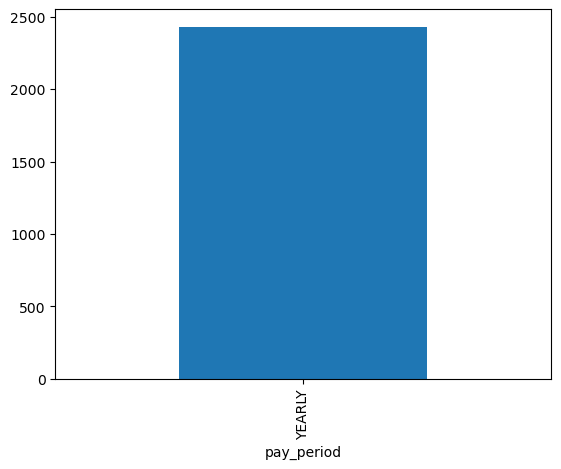

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

jobs_data['pay_period'].value_counts().plot(kind='bar')

In [39]:
jobs_data2 = pd.read_csv("data/job_postings.csv")

jobs_data2.drop(columns=["max_salary","min_salary","job_id","expiry","closed_time","applies","currency","compensation_type"	,"original_listed_time",	"remote_allowed",	"views",	"job_posting_url",	"application_url"	,"application_type","formatted_experience_level","skills_desc","listed_time",	"posting_domain",	"sponsored"	,"work_type"],inplace=True)
jobs_data2 = jobs_data2[jobs_data2.pay_period.notnull()]
# jobs_data2.drop(columns=["pay_period"],inplace=True) #É para meter junto com salary
jobs_data2 = jobs_data2[jobs_data2.med_salary.notnull()]
jobs_data2.rename(columns = {'med_salary':'salary','formatted_work_type':'work-type'}, inplace = True)
jobs_data2.head()


,company_id,title,description,salary,pay_period,work-type,location
18,1082195.0,Contract Bilingual Recruiter,"Location: Phoenix, AZ 85006---- IN OFFICE JOB ...",65000.00,YEARLY,Contract,"Phoenix, AZ"
96,72739246.0,After School Academic Tutor,"Sterling House Community Center, Inc. Title: A...",33.59,HOURLY,Full-time,"Stratford, CT"
99,90666319.0,oracle SCM TECHNO CLOUD FUNCTIONAL,CumminsOracle cloud SCM technical\nWe need EBS...,67.00,HOURLY,Contract,"Columbus, IN"
141,5059324.0,Estimator,EstimatorThe Procopio Companies (TPC) is a gro...,12.00,HOURLY,Full-time,"Middleton, MA"
142,5059324.0,Site Foreman,Site Crew Foreman The Procopio Companies (TPC)...,12.00,HOURLY,Full-time,"Middleton, MA"


<Axes: xlabel='work-type'>

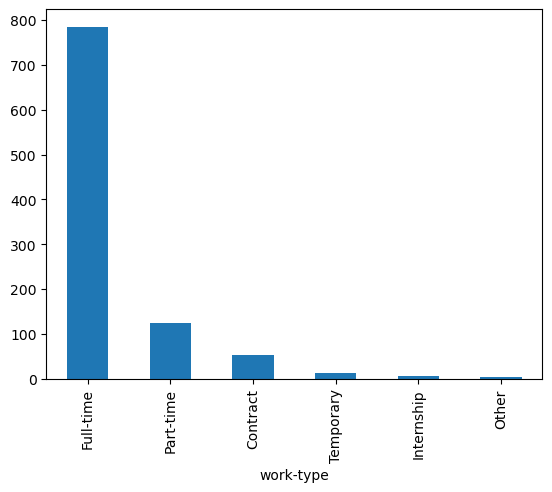

In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
jobs_data2['work-type'].value_counts().plot(kind='bar')

In [41]:

jobs_data_final = pd.concat([jobs_data,jobs_data2])
jobs_data_final.head()


,title,work-type,salary,location,description,pay_period,company_id
0,Central Graduate Advisor,Full-time,47210.0,"Edmonton, AB",FGSR Grad Studies & Rsrch Admi\n\nCompetition ...,YEARLY,3.700153e+09
1,Post-doctoral Fellow,Full-time,50000.0,"Edmonton, AB",ART East Asian Studies\n\nCompetition No. -\nA...,YEARLY,3.700153e+09
2,Graduate Research Assistant,Full-time,20000.0,"Calgary, AB",The Adaptive Bionics Lab at the University of ...,YEARLY,3.700153e+09
3,Postdoctoral Fellow in Environmental Epidemiology,Full-time,50000.0,"Edmonton, AB",PH School of Public Health\n\nCompetition No. ...,YEARLY,3.700153e+09
4,"Advisor, Student Service Centre",Full-time,51055.0,"Edmonton, AB",RO Student Service Centre\n\nCompetition No. -...,YEARLY,3.700153e+09


<Axes: xlabel='pay_period'>

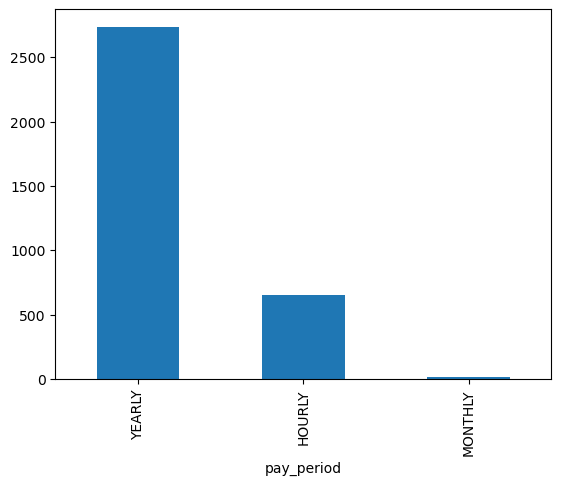

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
jobs_data_final['pay_period'].value_counts().plot(kind='bar')

In [43]:
company_data2 = pd.read_csv("data/companies.csv")
company_data2.drop(columns=["description",	"company_size",	"state"	,"country"	,"city",	"zip_code",	"address",	"url"],inplace=True)
company_data2.rename(columns = {'name':'company'}, inplace = True)

company_data2.head()
company_data_final = pd.concat([company_data,company_data2])
company_data_final.describe()

,company_id
count,7.888000e+03
mean,9.073491e+08
std,1.577545e+09
min,1.009000e+03
25%,2.328195e+05
50%,9.321004e+06
75%,9.436839e+07
max,3.700154e+09
